## Nb objectives

    -check that mm_carbonate and mocsy carbonate routines give same values given same input parameters
    -adjust mm_carbonate just to take optional calcium value, plot this sensitivity
    -plot timeseries of available river carbon data

In [13]:
from IPython.display import HTML

HTML('''<script>
code_show=true; 
function code_toggle() {
 if (code_show){
 $('div.input').hide();
 } else {
 $('div.input').show();
 }
 code_show = !code_show
} 
$( document ).ready(code_toggle);
</script>
<form action="javascript:code_toggle()"><input type="submit" value="Click here to toggle on/off the raw code."></form>''')

In [14]:
#import all the things

%reset
import sys
sys.path.append('/data/tjarniko/mocsy')
import netCDF4 as nc
import matplotlib.pyplot as plt
import datetime
import os
import numpy as np
import mocsy 
import cmocean as cm
from salishsea_tools import visualisations as vis
from salishsea_tools import (teos_tools, tidetools, viz_tools)
import xarray as xr 
import subprocess 
import cmocean
from matplotlib import reload
import pandas as pd
import carbonate as car
plt.style.use('ggplot')

%matplotlib inline

Once deleted, variables cannot be recovered. Proceed (y/[n])? y


In [15]:
reload(car)

<module 'carbonate' from '/data/tjarniko/MEOPAR/at3/notebooks/carbon_dev/carbonate.py'>

In [16]:
calc = np.arange(0,0.001,0.0001)
calc2 = calc
print(calc.shape)
DA100 = np.zeros([2,10])
DA100[:] = 100 
DA500 = DA100 * 5
DA1000 = DA100 * 10
DA2000 = DA100 * 20
TEMP = np.zeros([1,10])
TEMP[:] = 10
SAL = np.zeros([1,10])
SAL[:] = 0.5
SAL5 = SAL *10
P = np.zeros([1,10])
P[:] = 1.01325
zero = np.zeros([1,10])

print('Sal = 0.5')
D100 = car.calc_carbonate(DA100,zero,zero,TEMP,SAL,P,['TC','TA'],calc = calc)
D500 = car.calc_carbonate(DA500,zero,zero,TEMP,SAL,P,['TC','TA'],calc = calc)
D1000 = car.calc_carbonate(DA1000,zero,zero,TEMP,SAL,P,['TC','TA'],calc = calc)
print('Sal = 5')
D100s5 = car.calc_carbonate(DA100,zero,zero,TEMP,SAL5,P,['TC','TA'],calc = calc)
D500s5 = car.calc_carbonate(DA500,zero,zero,TEMP,SAL5,P,['TC','TA'],calc = calc)
D1000s5 = car.calc_carbonate(DA1000,zero,zero,TEMP,SAL5,P,['TC','TA'],calc = calc)

(10,)
Sal = 0.5
checking for calcium
[ 0.      0.0001  0.0002  0.0003  0.0004  0.0005  0.0006  0.0007  0.0008
  0.0009]
using calcium values provided
[[ 0.00014692  0.00014692  0.0002      0.0003      0.0004      0.0005
   0.0006      0.0007      0.0008      0.0009    ]]
what Ca would be if it was calculated from salinity
[[ 0.00014692  0.00014692  0.00014692  0.00014692  0.00014692  0.00014692
   0.00014692  0.00014692  0.00014692  0.00014692]]
checking for calcium
[ 0.      0.0001  0.0002  0.0003  0.0004  0.0005  0.0006  0.0007  0.0008
  0.0009]
using calcium values provided
[[ 0.00014692  0.00014692  0.0002      0.0003      0.0004      0.0005
   0.0006      0.0007      0.0008      0.0009    ]]
what Ca would be if it was calculated from salinity
[[ 0.00014692  0.00014692  0.00014692  0.00014692  0.00014692  0.00014692
   0.00014692  0.00014692  0.00014692  0.00014692]]
checking for calcium
[ 0.      0.0001  0.0002  0.0003  0.0004  0.0005  0.0006  0.0007  0.0008
  0.0009]
using calciu

In [17]:
zero = np.array([0,0,0])
TEMP = np.array([10,10,10])
SAL = np.array([0.5,0.5,0.5])
SAL5 = SAL*10
P = np.array([1.01325,1.01325,1.01325])
#DA = np.array([2100,2000])
DA = np.array([[100,500,1000],[100,500,1000]])
DA_mocsy = [100,500,1000]
calc = [0.00035,0.00035,0.00035]
# calc = np.array([0.010284569700849724,0.0029384484859570643])

response_tup = mocsy.mvars(temp=TEMP, sal=SAL, alk=DA[1,:]*1e-6, dic=DA[0,:]*1e-6, 
                   sil=zero, phos=zero, patm=P, depth=zero, lat=zero, 
                    optcon='mol/kg', optt='Tinsitu', optp='db',
                    optb = 'u74', optk1k2='m10', optkf = 'pf', optgas = 'Pinsitu')
pH,pco2,fco2,co2,hco3,co3,OmegaA,OmegaC,BetaD,DENis,p,Tis = response_tup

response_tup5 = mocsy.mvars(temp=TEMP, sal=SAL5, alk=DA[1,:]*1e-6, dic=DA[0,:]*1e-6, 
                   sil=zero, phos=zero, patm=P, depth=zero, lat=zero, 
                    optcon='mol/kg', optt='Tinsitu', optp='db',
                    optb = 'u74', optk1k2='m10', optkf = 'pf', optgas = 'Pinsitu')
pH,pco2,fco2,co2,hco3,co3,OmegaA5,OmegaC,BetaD,DENis,p,Tis = response_tup5

MM = car.calc_carbonate(DA,zero,zero,TEMP,SAL,P,['TC','TA'])
MM5 = car.calc_carbonate(DA,zero,zero,TEMP,SAL5,P,['TC','TA'])

MM_calc = car.calc_carbonate(DA,zero,zero,TEMP,SAL,P,['TC','TA'],calc=calc)
MM5_calc = car.calc_carbonate(DA,zero,zero,TEMP,SAL5,P,['TC','TA'],calc=calc)



checking for calcium
None
no calcium values given, Ca linear fxn of salinity
Ca calculated from salinity
[ 0.00014692  0.00014692  0.00014692]
checking for calcium
None
no calcium values given, Ca linear fxn of salinity
Ca calculated from salinity
[ 0.00146922  0.00146922  0.00146922]
checking for calcium
[0.00035, 0.00035, 0.00035]
using calcium values provided
[ 0.00035  0.00035  0.00035]
what Ca would be if it was calculated from salinity
[ 0.00014692  0.00014692  0.00014692]
checking for calcium
[0.00035, 0.00035, 0.00035]
using calcium values provided
[ 0.00146922  0.00146922  0.00146922]
what Ca would be if it was calculated from salinity
[ 0.00146922  0.00146922  0.00146922]


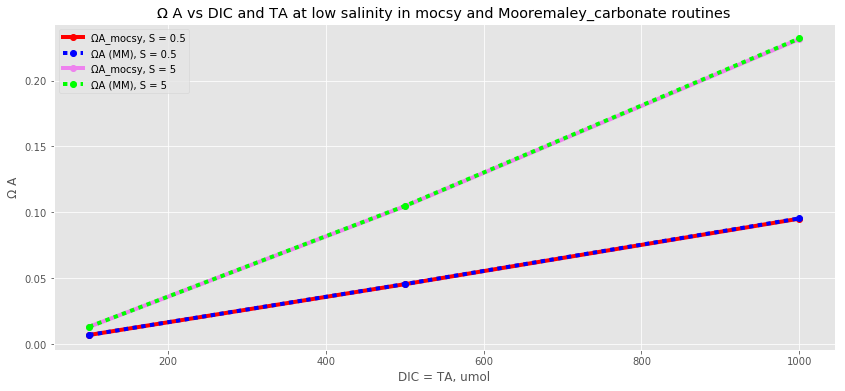

In [18]:
f, ax1 = plt.subplots(1,1, figsize = (14, 6), sharey = True)

ax1.plot(DA_mocsy, MM['OmegaA'],marker='o', markerfacecolor='red', color = 'red', linewidth= 4)
ax1.plot(DA_mocsy, OmegaA,marker='o', linestyle=':', markerfacecolor='blue', color = 'blue', linewidth=4 )

ax1.plot(DA_mocsy, MM5['OmegaA'],marker='o', markerfacecolor='violet', color = 'violet', linewidth= 4)
ax1.plot(DA_mocsy, OmegaA5,marker='o', linestyle=':', markerfacecolor='lime', color = 'lime', linewidth=4 )

plt.legend(['ΩA_mocsy, S = 0.5','ΩA (MM), S = 0.5',\
            'ΩA_mocsy, S = 5','ΩA (MM), S = 5','OmegaA (MM), S = 0.5','OmegaA (MM), S = 5'])
plt.ylabel('Ω A')
plt.xlabel('DIC = TA, umol')
plt.title('Ω A vs DIC and TA at low salinity in mocsy and Mooremaley_carbonate routines')

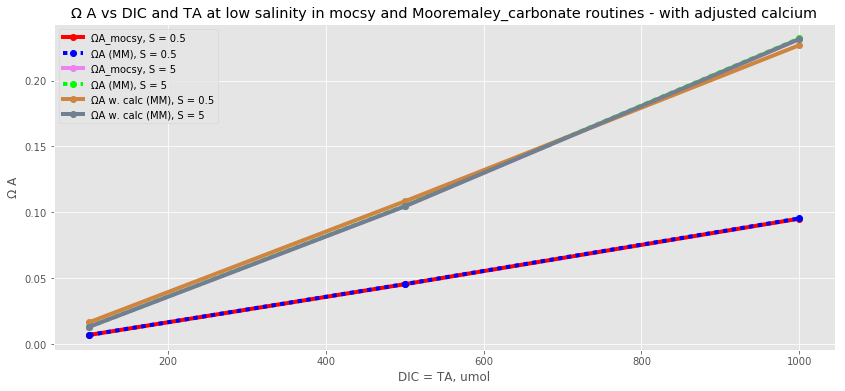

In [19]:
f, ax1 = plt.subplots(1,1, figsize = (14, 6), sharey = True)

ax1.plot(DA_mocsy, MM['OmegaA'],marker='o', markerfacecolor='red', color = 'red', linewidth= 4)
ax1.plot(DA_mocsy, OmegaA,marker='o', linestyle=':', markerfacecolor='blue', color = 'blue', linewidth=4 )

ax1.plot(DA_mocsy, MM5['OmegaA'],marker='o', markerfacecolor='violet', color = 'violet', linewidth= 4)
ax1.plot(DA_mocsy, OmegaA5,marker='o', linestyle=':', markerfacecolor='lime', color = 'lime', linewidth=4 )

ax1.plot(DA_mocsy, MM_calc['OmegaA'],marker='o', markerfacecolor='peru', color = 'peru', linewidth= 4)
ax1.plot(DA_mocsy, MM5_calc['OmegaA'],marker='o', markerfacecolor='slategrey', color = 'slategrey', linewidth= 4)

plt.legend(['ΩA_mocsy, S = 0.5','ΩA (MM), S = 0.5',\
            'ΩA_mocsy, S = 5','ΩA (MM), S = 5','ΩA w. calc (MM), S = 0.5','ΩA w. calc (MM), S = 5'])
plt.ylabel('Ω A')
plt.xlabel('DIC = TA, umol')
plt.title('Ω A vs DIC and TA at low salinity in mocsy and Mooremaley_carbonate routines - with adjusted calcium')

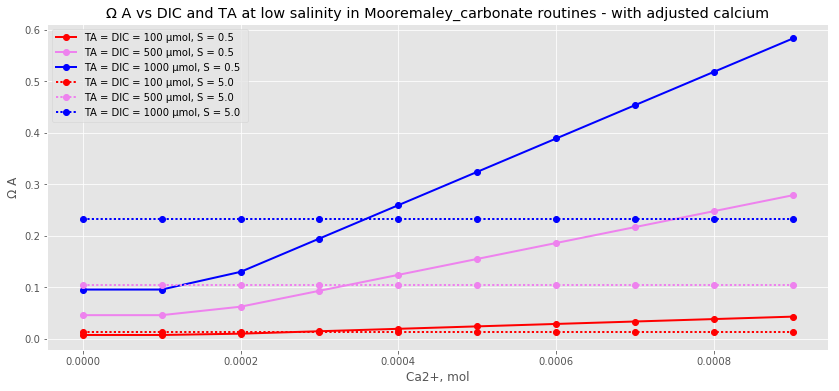

In [20]:
f, ax1 = plt.subplots(1,1, figsize = (14, 6), sharey = True)

ax1.plot(calc2, np.squeeze(D100['OmegaA']),marker='o', \
         markerfacecolor='red', color = 'red', linewidth=2 )
ax1.plot(calc2, np.squeeze(D500['OmegaA']),marker='o', \
         markerfacecolor='violet', color = 'violet', linewidth=2 )
ax1.plot(calc2, np.squeeze(D1000['OmegaA']),marker='o', \
         markerfacecolor='blue', color = 'blue', linewidth=2 )

ax1.plot(calc2, np.squeeze(D100s5['OmegaA']),marker='o', \
         markerfacecolor='red', color = 'red', linestyle = ":", linewidth=2 )
ax1.plot(calc2, np.squeeze(D500s5['OmegaA']),marker='o', \
         markerfacecolor='violet', color = 'violet', linestyle = ":", linewidth=2 )
ax1.plot(calc2, np.squeeze(D1000s5['OmegaA']),marker='o', \
         markerfacecolor='blue', color = 'blue', linestyle = ":", linewidth=2 )

plt.legend(['TA = DIC = 100 μmol, S = 0.5 ','TA = DIC = 500 μmol, S = 0.5 ','TA = DIC = 1000 μmol, S = 0.5 ',\
            'TA = DIC = 100 μmol, S = 5.0 ','TA = DIC = 500 μmol, S = 5.0 ','TA = DIC = 1000 μmol, S = 5.0 ',])
plt.ylabel('Ω A')
plt.xlabel('Ca2+, mol')
plt.title('Ω A vs DIC and TA at low salinity in Mooremaley_carbonate routines - with adjusted calcium')

## location of calc. ion calculation in carbonate, mocsy

    !# (0.02128d0/40.078d0) * salt/1.80655d0 
    !# 0.02128 / 40.087 * (S / 1.80655)

In [21]:
t1=pd.read_csv('/data/tjarniko/ECRivers/FraserAtHopeDissNaMgCa.csv')
Cas=[i for i in t1.keys() if i.startswith('Calcium')]
Fraser=pd.DataFrame()
Fraser['time']=t1['Sample time']
Fraser['time'] = pd.to_datetime(Fraser['time'])
Fraser['Ca_mgL']=[row[Cas[0]] if ~np.isnan(row[Cas[0]]) else 
              row[Cas[1]] if ~np.isnan(row[Cas[1]]) else
              row[Cas[2]] if ~np.isnan(row[Cas[2]]) else
              row[Cas[3]] if ~np.isnan(row[Cas[3]]) else
              row[Cas[4]] for r,row in t1.iterrows()]
Fraser['Fraser_Ca_mM']=Fraser['Ca_mgL']/40.078

t1=pd.read_csv('/ocean/eolson/MEOPAR/obs/ECRivers/Cowichan1kSomenosDissNaMgCa.csv')
Cas=[i for i in t1.keys() if i.startswith('Calcium')]
Cowichan=pd.DataFrame()
Cowichan['time']=t1['Sample time']
Cowichan['time'] = pd.to_datetime(Cowichan['time'])
Cowichan['Ca_mgL']=[row[Cas[0]] if ~np.isnan(row[Cas[0]]) else 
              row[Cas[1]] if ~np.isnan(row[Cas[1]]) else
              row[Cas[2]] for r,row in t1.iterrows()]
Cowichan['Cowichan_Ca_mM']=Cowichan['Ca_mgL']/40.078

t1=pd.read_csv('/ocean/eolson/MEOPAR/obs/ECRivers/EnglishmanHwy19DissNaMgCa.csv')
Cas=[i for i in t1.keys() if i.startswith('Calcium')]
Englishman=pd.DataFrame()
Englishman['time']=t1['Sample time']
Englishman['time'] = pd.to_datetime(Englishman['time'])
Englishman['Ca_mgL']=[row[Cas[0]] if ~np.isnan(row[Cas[0]]) else 
              row[Cas[1]] if ~np.isnan(row[Cas[1]]) else
              row[Cas[2]] if ~np.isnan(row[Cas[2]]) else
              row[Cas[3]] for r,row in t1.iterrows()]
Englishman['Englishman_Ca_mM']=Englishman['Ca_mgL']/40.078

t1=pd.read_csv('/ocean/eolson/MEOPAR/obs/ECRivers/TsolumBelowMurexDissNaMgCa.csv')
Cas=[i for i in t1.keys() if i.startswith('Calcium')]
Tsolum=pd.DataFrame()
Tsolum['time']=t1['Sample time']
Tsolum['time'] = pd.to_datetime(Tsolum['time'])
Tsolum['Ca_mgL']=[row[Cas[0]] if ~np.isnan(row[Cas[0]]) else 
              row[Cas[1]] if ~np.isnan(row[Cas[1]]) else
              row[Cas[2]] for r,row in t1.iterrows()]
Tsolum['Tsolum_Ca_mM']=Tsolum['Ca_mgL']/40.078

t1=pd.read_csv('/ocean/eolson/MEOPAR/obs/ECRivers/QuinsamMouthDissNaMgCa.csv')
Cas=[i for i in t1.keys() if i.startswith('Calcium')]
Quinsam=pd.DataFrame()
Quinsam['time']=t1['Sample time']
Quinsam['time'] = pd.to_datetime(Quinsam['time'])
Quinsam['Ca_mgL']=[row[Cas[0]] if ~np.isnan(row[Cas[0]]) else 
              row[Cas[1]] if ~np.isnan(row[Cas[1]]) else
              row[Cas[2]] if ~np.isnan(row[Cas[2]]) else
              row[Cas[3]] if ~np.isnan(row[Cas[3]]) else
              row[Cas[4]] for r,row in t1.iterrows()]
Quinsam['Quinsam_Ca_mM']=Quinsam['Ca_mgL']/40.078

t1=pd.read_csv('/ocean/eolson/MEOPAR/obs/ECRivers/CheakamusDaisyDissNaMgCa.csv')
Cas=[i for i in t1.keys() if i.startswith('Calcium')]
Cheakamus=pd.DataFrame()
Cheakamus['time']=t1['Sample time']
Cheakamus['time'] = pd.to_datetime(Cheakamus['time'])
Cheakamus['Ca_mgL']=[row[Cas[0]] if ~np.isnan(row[Cas[0]]) else 
              row[Cas[1]] if ~np.isnan(row[Cas[1]]) else
              row[Cas[2]] if ~np.isnan(row[Cas[2]]) else
              row[Cas[3]] for r,row in t1.iterrows()]
Cheakamus['Cheakamus_Ca_mM']=Cheakamus['Ca_mgL']/40.078

t1=pd.read_csv('/ocean/eolson/MEOPAR/obs/ECRivers/SumasIBDissNaMgCa.csv')
Cas=[i for i in t1.keys() if i.startswith('Calcium')]
Sumas=pd.DataFrame()
Sumas['time']=t1['Sample time']
Sumas['time'] = pd.to_datetime(Sumas['time'])
Sumas['Ca_mgL']=[row[Cas[0]] if ~np.isnan(row[Cas[0]]) else 
              row[Cas[1]] if ~np.isnan(row[Cas[1]]) else
              row[Cas[2]] if ~np.isnan(row[Cas[2]]) else
              row[Cas[3]] for r,row in t1.iterrows()]
Sumas['Sumas_Ca_mM']=Sumas['Ca_mgL']/40.078

t1=pd.read_csv('/ocean/eolson/MEOPAR/obs/ECRivers/FraserGravesendDissNaMgCa.csv')
Cas=[i for i in t1.keys() if i.startswith('Calcium')]
FraserGraves=pd.DataFrame()
FraserGraves['time']=t1['Sample time']
FraserGraves['time'] = pd.to_datetime(FraserGraves['time'])
FraserGraves['Ca_mgL']=[row[Cas[0]] if ~np.isnan(row[Cas[0]]) else 
              row[Cas[1]] for r,row in t1.iterrows()]
FraserGraves['FraserGraves_Ca_mM']=FraserGraves['Ca_mgL']/40.078

t1=pd.read_csv('/ocean/eolson/MEOPAR/obs/ECRivers/AlouetteDissNaMgCa.csv')
Cas=[i for i in t1.keys() if i.startswith('Calcium')]
Alouette=pd.DataFrame()
Alouette['time']=t1['Sample time']
Alouette['time'] = pd.to_datetime(Alouette['time'])
Alouette['Ca_mgL']=[row[Cas[0]] if ~np.isnan(row[Cas[0]]) else 
              row[Cas[1]] if ~np.isnan(row[Cas[1]]) else 
              row[Cas[2]] if ~np.isnan(row[Cas[2]]) else 
              row[Cas[3]] for r,row in t1.iterrows()]
Alouette['Alouette_Ca_mM']=Alouette['Ca_mgL']/40.078


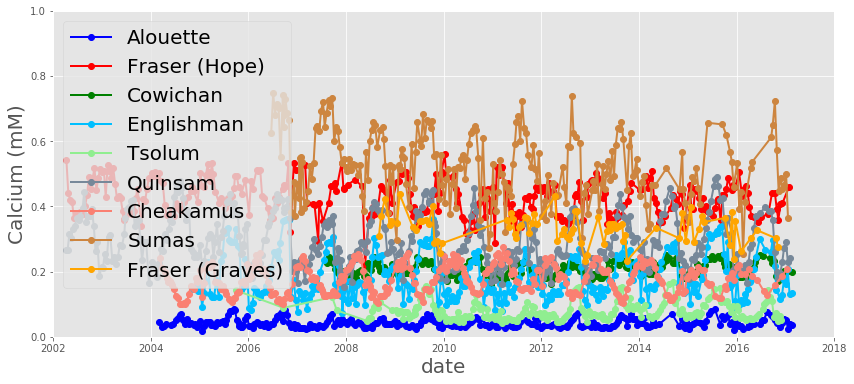

In [22]:
f, ax1 = plt.subplots(1,1, figsize = (14, 6), sharey = True)

ax1.plot('time', 'Alouette_Ca_mM', data=Alouette, marker='o', \
         markerfacecolor='blue', color = 'blue', linewidth=2 )
ax1.plot('time', 'Fraser_Ca_mM', data=Fraser, marker='o', \
         markerfacecolor='red', color = 'red', linewidth=2 )
ax1.plot('time', 'Cowichan_Ca_mM', data=Cowichan, marker='o',\
         markerfacecolor='green', color = 'green', linewidth=2 )
ax1.plot('time', 'Englishman_Ca_mM', data=Englishman, marker='o', \
        markerfacecolor='deepskyblue', color = 'deepskyblue', linewidth=2 )
ax1.plot('time', 'Tsolum_Ca_mM', data=Tsolum, marker='o', \
        markerfacecolor='lightgreen', color = 'lightgreen', linewidth=2 )
ax1.plot('time', 'Quinsam_Ca_mM', data=Quinsam, marker='o', \
        markerfacecolor='lightslategray', color = 'lightslategrey', linewidth=2 )
ax1.plot('time', 'Cheakamus_Ca_mM', data=Cheakamus, marker='o',\
        markerfacecolor='salmon', color = 'salmon', linewidth=2 )
ax1.plot('time', 'Sumas_Ca_mM', data=Sumas, marker='o',\
        markerfacecolor='peru', color = 'peru', linewidth=2 )
ax1.plot('time', 'FraserGraves_Ca_mM', data=FraserGraves, marker='o',\
        markerfacecolor='orange', color = 'orange', linewidth=2 )
plt.legend(['Alouette','Fraser (Hope)','Cowichan','Englishman',\
            'Tsolum','Quinsam','Cheakamus','Sumas','Fraser (Graves)'],fontsize = 20)
plt.xlim([730851,736695])
plt.ylim([0,1])
plt.xlabel('date',fontsize = 20)
plt.ylabel('Calcium (mM)',fontsize = 20)

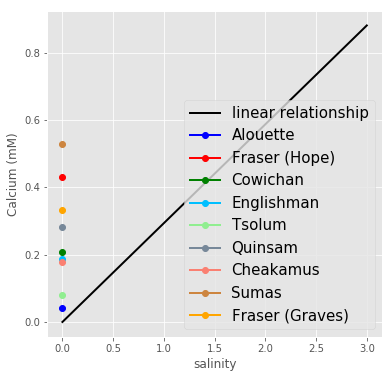

In [23]:
S = np.arange(0,35,0.5)
#print('Salinity: ', S)
C = 0.02128 / 40.087 * (S / 1.80655)
# print('calcium in moles:', C)
# print('(calcium in umols)', C*1e6)
# print('(calcium in mmols)', C*1e3)

# 350 µmol kg−

f, (ax2) = plt.subplots(1,1, figsize = (6, 6), sharey = False)


ax2.plot(S[0:7],C[0:7]*1e3, marker= None, \
         markerfacecolor='black', color = 'black', linewidth=2)


ax2.plot(0,np.mean(Alouette['Alouette_Ca_mM']),marker= 'o', \
         markerfacecolor='blue', color = 'blue', linewidth=2)
ax2.plot(0,np.mean(Fraser['Fraser_Ca_mM']),  marker='o', \
          markerfacecolor='red', color = 'red', linewidth=2 )
ax2.plot(0,np.mean(Cowichan['Cowichan_Ca_mM']),  marker='o', \
          markerfacecolor='green', color = 'green', linewidth=2 )
ax2.plot(0,np.mean(Englishman['Englishman_Ca_mM']),  marker='o', \
         markerfacecolor='deepskyblue', color = 'deepskyblue', linewidth=2 )
ax2.plot(0,np.mean(Tsolum['Tsolum_Ca_mM']),  marker='o', \
         markerfacecolor='lightgreen', color = 'lightgreen', linewidth=2 )
ax2.plot(0,np.mean(Quinsam['Quinsam_Ca_mM']),  marker='o', \
         markerfacecolor='lightslategray', color = 'lightslategrey', linewidth=2 )
ax2.plot(0,np.mean(Cheakamus['Cheakamus_Ca_mM']),  marker='o', \
         markerfacecolor='salmon', color = 'salmon', linewidth=2 )
ax2.plot(0,np.mean(Sumas['Sumas_Ca_mM']),  marker='o', \
         markerfacecolor='peru', color = 'peru', linewidth=2 )
ax2.plot(0,np.mean(FraserGraves['FraserGraves_Ca_mM']),  marker='o', \
         markerfacecolor='orange', color = 'orange', linewidth=2 )
plt.legend(['linear relationship','Alouette','Fraser (Hope)','Cowichan','Englishman',\
            'Tsolum','Quinsam','Cheakamus','Sumas','Fraser (Graves)'], fontsize = 15)
ax2.set_xlabel('salinity')
ax2.set_ylabel('Calcium (mM)')

In [24]:
0.6 * 1e-3

0.0006